In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [2]:
# Iris dataset contains three classes of flowers with four features each
iris = datasets.load_iris()

# For simplicity and visualization, we will use only the first two features (Sepal Length, Sepal Width)
X = iris.data[:, :2]  # First two features
y = iris.target  # Target labels (three classes of iris flowers)


In [3]:
# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Function to plot decision boundaries for SVM
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()


Accuracy with linear kernel: 0.80


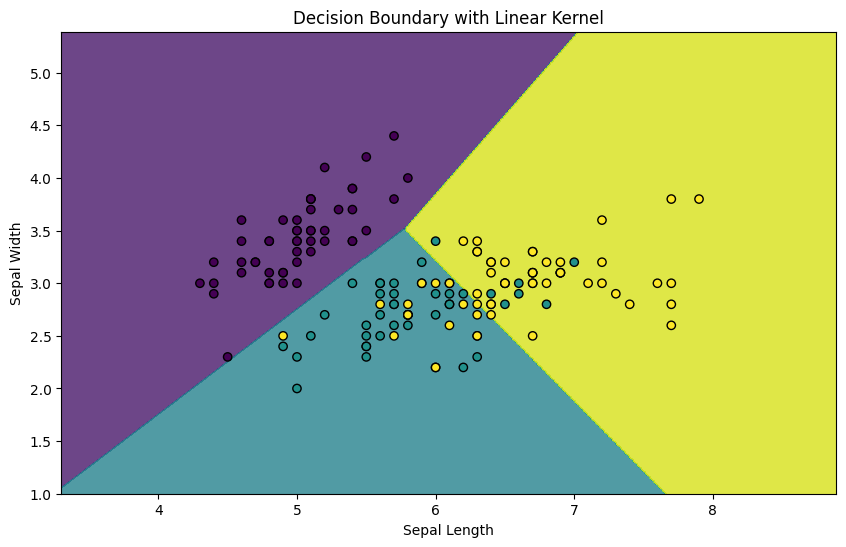

Accuracy with poly kernel: 0.73


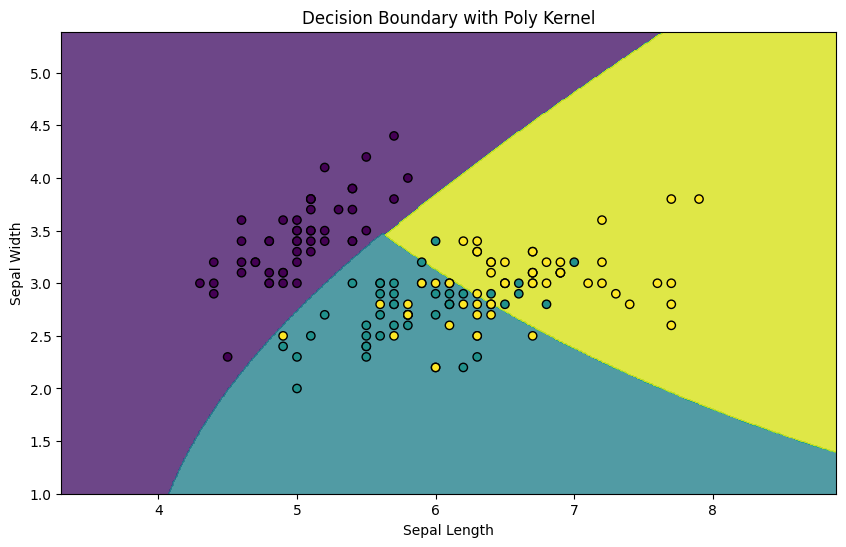

Accuracy with rbf kernel: 0.80


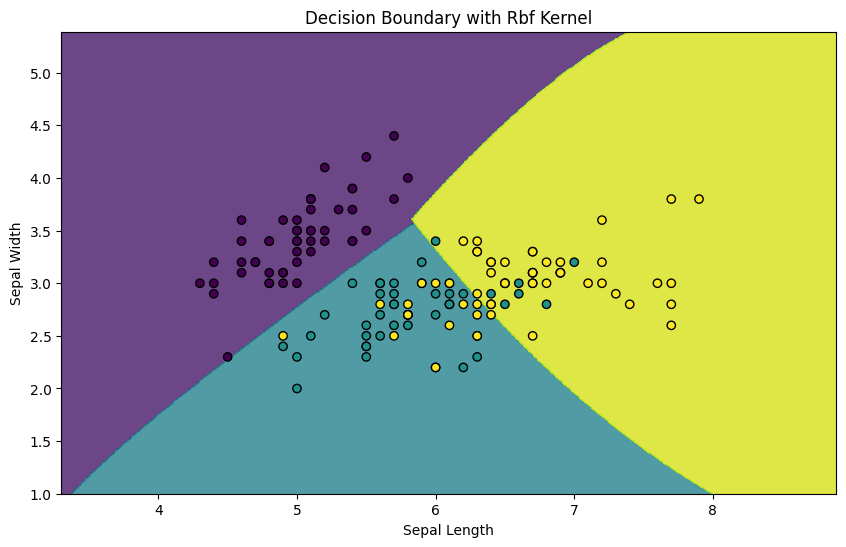

In [5]:
# Train SVM with different kernels and visualize decision boundaries
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    # Train SVM with the specified kernel
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with {kernel} kernel: {accuracy:.2f}')

    # Plot decision boundaries
    plot_decision_boundary(clf, X, y, f'Decision Boundary with {kernel.capitalize()} Kernel')


# **Analysis**
#### Linear Kernel
- **Decision Boundary**: The linear kernel creates a straight line to separate different classes. It works best when the data can be split using a simple line.
- **Accuracy**: For datasets like Iris, the linear kernel might perform well, but it can struggle when the data points from different classes overlap.
- **Advantages**:
   - It is fast and simple to use since it only looks for a straight line to separate the data.
   - Good for data that is easy to separate with a straight line.
   - Less likely to overfit (perform well on training data but poorly on new data).
- **Disadvantages**:
   - It doesn't work well for data that has a more complex structure, where a straight line can't easily separate the classes.

- **Use Case**: Use the linear kernel if your data can be separated by a simple straight line.


#### Polynomial Kernel
- **Decision Boundary**: The polynomial kernel draws curved lines to separate classes. The shape of the line depends on the "degree" of the polynomial, which controls how complex the curve is.
- **Accuracy**: It can improve accuracy if your data requires a curved line to be properly separated. In the Iris dataset, it might do better than the linear kernel for certain cases.
- **Advantages**:
   - Can handle more complex patterns in the data by drawing curved lines.
   - You can adjust how complex the curve is by changing the "degree".
- **Disadvantages**:
   - It is slower than the linear kernel and can take longer to compute.
   - If you set the degree too high, it can overfit, meaning it works great for training data but poorly on new data.

- **Use Case**: Use the polynomial kernel if you think the data requires a more flexible boundary than a straight line but don’t want a very complex model.


#### Radial Basis Function (RBF) Kernel
- **Decision Boundary**: The RBF kernel creates very complex shapes to separate the classes. It is powerful because it can handle data that is not easily split with straight or simple curved lines.
- **Accuracy**: The RBF kernel often gives the best accuracy for datasets like Iris because it can handle overlapping classes very well.
- **Advantages**:
   - Very flexible and works well with complex data that can’t be split by a simple line.
   - Great for situations where classes overlap and need complex boundaries.
- **Disadvantages**:
   - It is slower to compute and needs fine-tuning (adjusting specific parameters) to get the best results.
   - If not tuned correctly, it can overfit, meaning it works very well on training data but poorly on new data.

- **Use Case**: Use the RBF kernel when your data is complex and requires a highly flexible decision boundary. However, you must carefully adjust the model settings to avoid overfitting.


#  Trade-offs in Choosing a Kernel Function

- **Linear Kernel**:
   - **Pros**: Simple and fast. Works best for data that can be separated with a straight line.
   - **Cons**: Doesn’t handle complex data well.
   - **Best For**: Simple datasets that are easy to separate with a straight line.

- **Polynomial Kernel**:
   - **Pros**: More flexible than the linear kernel. Can draw curved lines to split classes.
   - **Cons**: Takes more time to compute and may overfit if not used properly.
   - **Best For**: Datasets that need curved lines for separation but aren’t too complex.

- **RBF Kernel**:
   - **Pros**: Most flexible, can handle very complex and overlapping data.
   - **Cons**: Slowest to compute and needs careful tuning to avoid overfitting.
   - **Best For**: Complex datasets where classes overlap and need non-linear boundaries to separate them.


#### Conclusion

- **Start Simple**: If your data can be easily separated with a straight line, use the **linear kernel** because it's fast and simple.
- **Test Polynomial**: If your data has some complexity, use the **polynomial kernel** to create curved boundaries, but be careful about making the model too complex.
- **Use RBF for Complex Data**: For highly complex data with overlapping classes, the **RBF kernel** is usually the best option, but it requires more fine-tuning and takes more time to compute.

By considering the type of data you're working with, you can choose the right kernel to get the best balance between accuracy and computation time.
